# pNbody tutorial

- official website : http://obswww.unige.ch/~revaz/pNbody/
- tutorial : http://obswww.unige.ch/~revaz/pNbody/rst/Tutorial.html

## Using pNbody in the interpreter

First, load the python module:

In [1]:
from pNbody import *

Create an empty pNbody object and get info

In [2]:
nb = Nbody()
nb.info()

TODO WARNING: A function that has not been fully written has been called.
TODO WARNING: This is most likely no reason to worry, but hopefully this message 
TODO WARNING: will annoy the developers enough to start clean their code up.
TODO WARNING: Meanwhile, you can just carry on doing whatever you were up to.
-----------------------------------
particle file       : ['file.dat']
ftype               : 'default'
mxntpe              : 6
nbody               : 0
nbody_tot           : 0
npart               : [0, 0, 0, 0, 0, 0]
npart_tot           : [0, 0, 0, 0, 0, 0]
mass_tot            : 0.0
byteorder           : 'little'
pio                 : 'no'


Create a pNbody object from positions:

In [4]:
pos = np.ones((10,3),np.float32)
nb = Nbody(pos=pos)
nb.info()

TODO WARNING: A function that has not been fully written has been called.
TODO WARNING: This is most likely no reason to worry, but hopefully this message 
TODO WARNING: will annoy the developers enough to start clean their code up.
TODO WARNING: Meanwhile, you can just carry on doing whatever you were up to.
-----------------------------------
particle file       : ['file.dat']
ftype               : 'default'
mxntpe              : 6
nbody               : 10
nbody_tot           : 10
npart               : [10, 0, 0, 0, 0, 0]
npart_tot           : [10, 0, 0, 0, 0, 0]
mass_tot            : 1.0
byteorder           : 'little'
pio                 : 'no'

len pos             : 10
pos[0]              : array([1., 1., 1.], dtype=float32)
pos[-1]             : array([1., 1., 1.], dtype=float32)
len vel             : 10
vel[0]              : array([0., 0., 0.], dtype=float32)
vel[-1]             : array([0., 0., 0.], dtype=float32)
len mass            : 10
mass[0]             : 0.1
mass[-1]      

Create a pNbody object using the ic module:

In [6]:
from pNbody import ic
nb = ic.plummer(10000,1,1,1,1,rmax=20.,M=1,name='plummer.dat',ftype='gadget')
comovingintegration = False
nb.write() # writes the nBody object to file 'plummer.dat' with the 'gadget' format (as specified in the Nbody object)

## Read a pNbody from a file

In [8]:
nb = Nbody('plummer.dat',ftype='gadget')

The format is gadget


In [9]:
comovingintegration = False

In [10]:
nb.info()

-----------------------------------
particle file       : ['plummer.dat']
ftype               : 'gadget'
mxntpe              : 6
nbody               : 10000
nbody_tot           : 10000
npart               : [10000, 0, 0, 0, 0, 0]
npart_tot           : [10000, 0, 0, 0, 0, 0]
mass_tot            : 0.99999976
byteorder           : 'little'
pio                 : 'no'

len pos             : 10000
pos[0]              : array([ 0.08620726, -0.8825551 , -0.68550044], dtype=float32)
pos[-1]             : array([-0.6835583 ,  2.1199563 , -0.13416442], dtype=float32)
len vel             : 10000
vel[0]              : array([0., 0., 0.], dtype=float32)
vel[-1]             : array([0., 0., 0.], dtype=float32)
len mass            : 10000
mass[0]             : 1e-04
mass[-1]            : 1e-04
len num             : 10000
num[0]              : 0
num[-1]             : 9999
len tpe             : 10000
tpe[0]              : 0
tpe[-1]             : 0

atime               : 0.0
redshift            : 0.0
fla

## Get particle properties
Particle properties are numpy arrays of size nb.nbody:


In [11]:
nb.pos

array([[ 0.08620726, -0.8825551 , -0.68550044],
       [-0.7158597 ,  1.8705164 , -0.16716339],
       [-0.0029057 , -0.03153811, -0.03678056],
       ...,
       [ 0.40189224,  0.11727811,  0.06398547],
       [-0.06060761, -0.17355472, -0.5085909 ],
       [-0.6835583 ,  2.1199563 , -0.13416442]], dtype=float32)

In [12]:
nb.vel

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [13]:
nb.mass

array([1.e-04, 1.e-04, 1.e-04, ..., 1.e-04, 1.e-04, 1.e-04], dtype=float32)

In [14]:
nb.num

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [15]:
nb.tpe

array([0, 0, 0, ..., 0, 0, 0])

Get the list of particle properties:

In [16]:
nb.get_list_of_array()

['mass', 'num', 'pos', 'tpe', 'vel']

## Display a model

## Get physical values

positins x coordinates:

In [18]:
nb.x()

array([ 0.08620726, -0.7158597 , -0.0029057 , ...,  0.40189224,
       -0.06060761, -0.6835583 ], dtype=float32)

center of mass


In [19]:
nb.cm()

array([ 0.0013582 , -0.04152351,  0.01155748])

angular momentum:

In [20]:
nb.Ltot()

array([0., 0., 0.], dtype=float32)

Compute potential and acceleration:

In [21]:
r   = nb.rxyz()
pot = nb.Pot(nb.pos,eps=0.1)
acc = nb.Accel(nb.pos,eps=0.1)

alternatively, you can use a treecode algorithm to compute the potential and acceleration (which is much faster):

In [22]:
pot = nb.TreePot(nb.pos,eps=0.1)
acc = nb.TreeAccel(nb.pos,eps=0.1)


create the tree : ErrTolTheta= 0.8


Plot:

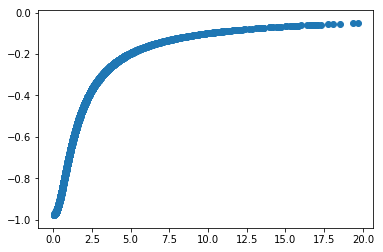

In [24]:
import pylab as pt
pt.scatter(r, pot)
pt.show();    # for some reason the plot doesn't show up unless you put the semicolon here.